# CNN

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)
!nvidia-smi

Num GPUs Available: 1
Sat Feb  8 00:35:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   77C    P0             37W /   72W |     489MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-------------------------

In [4]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = "/content/drive/MyDrive/Colab Notebooks/AAI-530/Final Project/aai-530-iot-smart-house/Data/Final_Combined_Data.csv"

df = pd.read_csv(file_path)

df.head()

,DateTime,RH (%),eCO₂ (ppm),Inside Dew Point - °C,Inside Heat Index - °C,Barometer - mb,Inside Temp - °C,Sensor
0,2022-12-31 23:53:24,73.0,518.0,6.9,12.3,1002.6,12.3,EcoLab Ground
1,2023-01-01 00:00:00,68.0,518.0,8.0,13.0,1002.6,13.0,WeatherLink
2,2023-01-01 00:00:55,73.0,520.0,7.0,12.4,1002.6,12.4,EcoLab Ground
3,2023-01-01 00:08:23,73.0,505.0,7.0,12.4,1002.6,12.4,EcoLab Ground
4,2023-01-01 00:15:00,68.0,505.0,8.0,13.0,1002.7,13.0,WeatherLink


In [7]:
# Convert 'DateTime' column to datetime format
df["DateTime"] = pd.to_datetime(df["DateTime"], errors="coerce")

# Verify conversion
df.info()  # Check if 'DateTime' is now datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112622 entries, 0 to 112621
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DateTime                112622 non-null  datetime64[ns]
 1   RH (%)                  112622 non-null  float64       
 2   eCO₂ (ppm)              112622 non-null  float64       
 3   Inside Dew Point - °C   112622 non-null  float64       
 4   Inside Heat Index - °C  112622 non-null  float64       
 5   Barometer - mb          112622 non-null  float64       
 6   Inside Temp - °C        112622 non-null  float64       
 7   Sensor                  112622 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.9+ MB


In [8]:
# Define the range
start_date = "2023-06-01"
end_date = "2023-11-30"

# Filter the DataFrame
df_filtered = df[(df["DateTime"] >= start_date) & (df["DateTime"] <= end_date)].copy()

# Verify the filtering
print(df_filtered["DateTime"].min(), "to", df_filtered["DateTime"].max())  # Confirm date range
print(df_filtered.shape)  # Check new dimensions

2023-06-01 00:00:00 to 2023-11-30 00:00:00
(65706, 8)


In [9]:
import numpy as np

# Extract time-based features
df_filtered["hour"] = df_filtered["DateTime"].dt.hour
df_filtered["day_of_week"] = df_filtered["DateTime"].dt.dayofweek  # Monday = 0, Sunday = 6
df_filtered["month"] = df_filtered["DateTime"].dt.month

# Convert hour, day_of_week, and month into cyclical features
df_filtered["hour_sin"] = np.sin(2 * np.pi * df_filtered["hour"] / 24)
df_filtered["hour_cos"] = np.cos(2 * np.pi * df_filtered["hour"] / 24)

df_filtered["day_sin"] = np.sin(2 * np.pi * df_filtered["day_of_week"] / 7)
df_filtered["day_cos"] = np.cos(2 * np.pi * df_filtered["day_of_week"] / 7)

df_filtered["month_sin"] = np.sin(2 * np.pi * df_filtered["month"] / 12)
df_filtered["month_cos"] = np.cos(2 * np.pi * df_filtered["month"] / 12)

# Drop the original DateTime, hour, day_of_week, and month columns
df_filtered.drop(["hour", "day_of_week", "month", "eCO₂ (ppm)", "Sensor"], axis=1, inplace=True)

# Display the first few rows after feature extraction
df_filtered.head(25)

,DateTime,RH (%),Inside Dew Point - °C,Inside Heat Index - °C,Barometer - mb,Inside Temp - °C,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
37338,2023-06-01 00:00:00,41.0,8.0,20.0,1026.4,21.0,0.000000,1.000000,0.433884,-0.900969,1.224647e-16,-1.0
37339,2023-06-01 00:00:23,49.0,9.4,19.6,1026.4,19.6,0.000000,1.000000,0.433884,-0.900969,1.224647e-16,-1.0
37340,2023-06-01 00:07:56,49.0,9.4,19.6,1026.4,19.6,0.000000,1.000000,0.433884,-0.900969,1.224647e-16,-1.0
37341,2023-06-01 00:15:00,41.0,8.0,20.0,1026.5,21.0,0.000000,1.000000,0.433884,-0.900969,1.224647e-16,-1.0
37342,2023-06-01 00:15:25,49.0,9.3,19.5,1026.5,19.5,0.000000,1.000000,0.433884,-0.900969,1.224647e-16,-1.0
37343,2023-06-01 00:22:56,49.0,9.3,19.5,1026.5,19.5,0.000000,1.000000,0.433884,-0.900969,1.224647e-16,-1.0
37344,2023-06-01 00:30:00,41.0,8.0,20.0,1026.4,21.0,0.000000,1.000000,0.433884,-0.900969,1.224647e-16,-1.0
37345,2023-06-01 00:30:24,49.0,9.3,19.5,1026.4,19.5,0.000000,1.000000,0.433884,-0.900969,1.224647e-16,-1.0
37346,2023-06-01 00:37:56,49.0,9.3,19.5,1026.4,19.5,0.000000,1.000000,0.433884,-0.900969,1.224647e-16,-1.0
37347,2023-06-01 00:45:00,41.0,8.0,20.0,1026.3,21.0,0.000000,1.000000,0.433884,-0.900969,1.224647e-16,-1.0


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Define features (X) and target (y)
features = ["RH (%)", "Inside Dew Point - °C", "Inside Heat Index - °C",
            "Barometer - mb", "hour_sin", "hour_cos", "day_sin", "day_cos", "month_sin", "month_cos"]
target = "Inside Temp - °C"

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit & transform features
df_filtered[features] = scaler.fit_transform(df_filtered[features])

# Scale target separately
target_scaler = MinMaxScaler()
df_filtered[[target]] = target_scaler.fit_transform(df_filtered[[target]])

# Verify scaling
df_filtered.head(12)

,DateTime,RH (%),Inside Dew Point - °C,Inside Heat Index - °C,Barometer - mb,Inside Temp - °C,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
37338,2023-06-01 00:00:00,0.295652,0.324074,0.264069,0.942029,0.321267,0.5,1.0,0.722521,5.551115e-17,1.0,0.0
37339,2023-06-01 00:00:23,0.434783,0.388889,0.246753,0.942029,0.257919,0.5,1.0,0.722521,5.551115e-17,1.0,0.0
37340,2023-06-01 00:07:56,0.434783,0.388889,0.246753,0.942029,0.257919,0.5,1.0,0.722521,5.551115e-17,1.0,0.0
37341,2023-06-01 00:15:00,0.295652,0.324074,0.264069,0.943347,0.321267,0.5,1.0,0.722521,5.551115e-17,1.0,0.0
37342,2023-06-01 00:15:25,0.434783,0.384259,0.242424,0.943347,0.253394,0.5,1.0,0.722521,5.551115e-17,1.0,0.0
37343,2023-06-01 00:22:56,0.434783,0.384259,0.242424,0.943347,0.253394,0.5,1.0,0.722521,5.551115e-17,1.0,0.0
37344,2023-06-01 00:30:00,0.295652,0.324074,0.264069,0.942029,0.321267,0.5,1.0,0.722521,5.551115e-17,1.0,0.0
37345,2023-06-01 00:30:24,0.434783,0.384259,0.242424,0.942029,0.253394,0.5,1.0,0.722521,5.551115e-17,1.0,0.0
37346,2023-06-01 00:37:56,0.434783,0.384259,0.242424,0.942029,0.253394,0.5,1.0,0.722521,5.551115e-17,1.0,0.0
37347,2023-06-01 00:45:00,0.295652,0.324074,0.264069,0.940711,0.321267,0.5,1.0,0.722521,5.551115e-17,1.0,0.0


In [11]:
import numpy as np
from tqdm import tqdm

# Function to create sequences with tqdm progress bar
def create_sequences(df, feature_cols, target_col, time_steps):
    X, y = [], []
    for i in tqdm(range(len(df) - time_steps), desc=f"Creating sequences (Time Steps: {time_steps})"):
        X.append(df[feature_cols].iloc[i:i + time_steps].values)
        y.append(df[target_col].iloc[i + time_steps])
    return np.array(X), np.array(y)

# Create datasets for each timestep with tqdm
X_1hr, y_1hr = create_sequences(df_filtered, features, target, time_steps=12)  # 1 hour
X_6hr, y_6hr = create_sequences(df_filtered, features, target, time_steps=72)  # 6 hours
X_24hr, y_24hr = create_sequences(df_filtered, features, target, time_steps=288)  # 24 hours

# Check shapes
print(f"1-hour Forecast: X={X_1hr.shape}, y={y_1hr.shape}")
print(f"6-hour Forecast: X={X_6hr.shape}, y={y_6hr.shape}")
print(f"24-hour Forecast: X={X_24hr.shape}, y={y_24hr.shape}")

Creating sequences (Time Steps: 288): 100%|██████████| 65418/65418 [03:01<00:00, 360.38it/s]


1-hour Forecast: X=(65694, 12, 10), y=(65694,)
6-hour Forecast: X=(65634, 72, 10), y=(65634,)
24-hour Forecast: X=(65418, 288, 10), y=(65418,)


In [27]:
from sklearn.model_selection import train_test_split

# Split the datasets
X_train_1hr, X_test_1hr, y_train_1hr, y_test_1hr = train_test_split(X_1hr, y_1hr, test_size=0.2, shuffle=False)
X_train_6hr, X_test_6hr, y_train_6hr, y_test_6hr = train_test_split(X_6hr, y_6hr, test_size=0.2, shuffle=False)
X_train_24hr, X_test_24hr, y_train_24hr, y_test_24hr = train_test_split(X_24hr, y_24hr, test_size=0.2, shuffle=False)

# Check shapes
print(f"Train/Test Split (1-hour): X_train={X_train_1hr.shape}, X_test={X_test_1hr.shape}")
print(f"Train/Test Split (6-hour): X_train={X_train_6hr.shape}, X_test={X_test_6hr.shape}")
print(f"Train/Test Split (24-hour): X_train={X_train_24hr.shape}, X_test={X_test_24hr.shape}")

Train/Test Split (1-hour): X_train=(52555, 12, 10), X_test=(13139, 12, 10)
Train/Test Split (6-hour): X_train=(52507, 72, 10), X_test=(13127, 72, 10)
Train/Test Split (24-hour): X_train=(52334, 288, 10), X_test=(13084, 288, 10)


## CNN Model

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [28]:
import itertools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tqdm import tqdm
import numpy as np
import pandas as pd

# Enable GPU memory growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("GPU memory growth enabled.")
else:
    print("No GPU detected. Running on CPU.")

# Define hyperparameter space
filters_options = [32, 64, 128]
kernel_size_options = [3, 5]
dropout_options = [0.2, 0.4]
l2_reg_options = [0.0001, 0.001, 0.01]

# Generate all possible hyperparameter combinations
hyperparameter_grid = list(itertools.product(filters_options, kernel_size_options, dropout_options, l2_reg_options))

# Function to build CNN without extra Conv1D layers
def build_cnn(time_steps, num_features, filters, kernel_size, dropout_rate, l2_reg):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation="relu", input_shape=(time_steps, num_features),
                      kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(1))  # Output layer (temperature prediction)

    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model



GPU memory growth enabled.


In [29]:
# Track best model
best_model = None
best_loss = float("inf")
best_params = None
history_records = []

# Iterate through all hyperparameter combinations
for i, (filters, kernel_size, dropout_rate, l2_reg) in enumerate(
    tqdm(hyperparameter_grid, desc="Grid Search Progress")):

    print(f"\n[{i+1}/{len(hyperparameter_grid)}] Training Model: Filters={filters}, Kernel={kernel_size}, Dropout={dropout_rate}, L2={l2_reg}")

    with tf.device('/GPU:0'):  # Force GPU usage
        # Build the model
        model = build_cnn(time_steps=12, num_features=X_train_1hr.shape[-1],
                          filters=filters, kernel_size=kernel_size, dropout_rate=dropout_rate, l2_reg=l2_reg)

        # Callbacks for Early Stopping and Learning Rate Reduction
        early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=0)

        # Train the model
        history = model.fit(X_train_1hr, y_train_1hr, validation_data=(X_test_1hr, y_test_1hr),
                            epochs=50, batch_size=32, verbose=0, callbacks=[early_stopping, lr_scheduler])

        # Get final validation loss
        val_loss = min(history.history["val_loss"])
        history_records.append((filters, kernel_size, dropout_rate, l2_reg, val_loss))

        # Track best model
        if val_loss < best_loss:
            best_loss = val_loss
            best_model = model
            best_params = (filters, kernel_size, dropout_rate, l2_reg)

        # Print update every 5 models
        if (i + 1) % 5 == 0:
            print(f"\nBest so far: Filters={best_params[0]}, Kernel={best_params[1]}, Dropout={best_params[2]}, L2={best_params[3]} with Loss: {best_loss:.4f}")

# Print the final best model parameters
print(f"\nBest Model Found: Filters={best_params[0]}, Kernel={best_params[1]}, Dropout={best_params[2]}, L2={best_params[3]}")
print(f"Best Validation Loss: {best_loss:.4f}")

# Save the best model
best_model.save("best_cnn_model.h5")

# Save hyperparameter history
history_df = pd.DataFrame(history_records, columns=["filters", "kernel_size", "dropout_rate", "l2_reg", "val_loss"])
history_df.to_csv("cnn_grid_search_results.csv", index=False)

Grid Search Progress:   0%|          | 0/36 [00:00<?, ?it/s]


[1/36] Training Model: Filters=32, Kernel=3, Dropout=0.2, L2=0.0001


Grid Search Progress:   3%|▎         | 1/36 [00:46<27:17, 46.79s/it]


[2/36] Training Model: Filters=32, Kernel=3, Dropout=0.2, L2=0.001


Grid Search Progress:   6%|▌         | 2/36 [01:20<22:06, 39.03s/it]


[3/36] Training Model: Filters=32, Kernel=3, Dropout=0.2, L2=0.01


Grid Search Progress:   8%|▊         | 3/36 [02:18<26:17, 47.80s/it]


[4/36] Training Model: Filters=32, Kernel=3, Dropout=0.4, L2=0.0001


Grid Search Progress:  11%|█         | 4/36 [03:17<27:53, 52.30s/it]


[5/36] Training Model: Filters=32, Kernel=3, Dropout=0.4, L2=0.001


Grid Search Progress:  14%|█▍        | 5/36 [03:55<24:21, 47.14s/it]


Best so far: Filters=32, Kernel=3, Dropout=0.2, L2=0.01 with Loss: 0.0008

[6/36] Training Model: Filters=32, Kernel=3, Dropout=0.4, L2=0.01


Grid Search Progress:  17%|█▋        | 6/36 [04:34<22:03, 44.11s/it]


[7/36] Training Model: Filters=32, Kernel=5, Dropout=0.2, L2=0.0001


Grid Search Progress:  19%|█▉        | 7/36 [05:03<19:04, 39.46s/it]


[8/36] Training Model: Filters=32, Kernel=5, Dropout=0.2, L2=0.001


Grid Search Progress:  22%|██▏       | 8/36 [06:00<20:58, 44.94s/it]


[9/36] Training Model: Filters=32, Kernel=5, Dropout=0.2, L2=0.01


Grid Search Progress:  25%|██▌       | 9/36 [06:39<19:19, 42.95s/it]


[10/36] Training Model: Filters=32, Kernel=5, Dropout=0.4, L2=0.0001


Grid Search Progress:  28%|██▊       | 10/36 [07:17<18:00, 41.55s/it]


Best so far: Filters=32, Kernel=3, Dropout=0.2, L2=0.01 with Loss: 0.0008

[11/36] Training Model: Filters=32, Kernel=5, Dropout=0.4, L2=0.001


Grid Search Progress:  31%|███       | 11/36 [07:56<16:55, 40.60s/it]


[12/36] Training Model: Filters=32, Kernel=5, Dropout=0.4, L2=0.01


Grid Search Progress:  33%|███▎      | 12/36 [08:30<15:26, 38.62s/it]


[13/36] Training Model: Filters=64, Kernel=3, Dropout=0.2, L2=0.0001


Grid Search Progress:  36%|███▌      | 13/36 [09:12<15:15, 39.81s/it]


[14/36] Training Model: Filters=64, Kernel=3, Dropout=0.2, L2=0.001


Grid Search Progress:  39%|███▉      | 14/36 [10:20<17:40, 48.19s/it]


[15/36] Training Model: Filters=64, Kernel=3, Dropout=0.2, L2=0.01


Grid Search Progress:  42%|████▏     | 15/36 [11:06<16:41, 47.69s/it]


Best so far: Filters=32, Kernel=3, Dropout=0.2, L2=0.01 with Loss: 0.0008

[16/36] Training Model: Filters=64, Kernel=3, Dropout=0.4, L2=0.0001


Grid Search Progress:  44%|████▍     | 16/36 [11:44<14:56, 44.81s/it]


[17/36] Training Model: Filters=64, Kernel=3, Dropout=0.4, L2=0.001


Grid Search Progress:  47%|████▋     | 17/36 [12:26<13:54, 43.94s/it]


[18/36] Training Model: Filters=64, Kernel=3, Dropout=0.4, L2=0.01


Grid Search Progress:  50%|█████     | 18/36 [13:05<12:40, 42.27s/it]


[19/36] Training Model: Filters=64, Kernel=5, Dropout=0.2, L2=0.0001


Grid Search Progress:  53%|█████▎    | 19/36 [13:51<12:21, 43.63s/it]


[20/36] Training Model: Filters=64, Kernel=5, Dropout=0.2, L2=0.001


Grid Search Progress:  56%|█████▌    | 20/36 [14:59<13:31, 50.73s/it]


Best so far: Filters=32, Kernel=3, Dropout=0.2, L2=0.01 with Loss: 0.0008

[21/36] Training Model: Filters=64, Kernel=5, Dropout=0.2, L2=0.01


Grid Search Progress:  58%|█████▊    | 21/36 [15:37<11:44, 46.94s/it]


[22/36] Training Model: Filters=64, Kernel=5, Dropout=0.4, L2=0.0001


Grid Search Progress:  61%|██████    | 22/36 [16:08<09:50, 42.21s/it]


[23/36] Training Model: Filters=64, Kernel=5, Dropout=0.4, L2=0.001


Grid Search Progress:  64%|██████▍   | 23/36 [16:42<08:37, 39.84s/it]


[24/36] Training Model: Filters=64, Kernel=5, Dropout=0.4, L2=0.01


Grid Search Progress:  67%|██████▋   | 24/36 [17:17<07:38, 38.19s/it]


[25/36] Training Model: Filters=128, Kernel=3, Dropout=0.2, L2=0.0001


Grid Search Progress:  69%|██████▉   | 25/36 [18:16<08:08, 44.44s/it]


Best so far: Filters=32, Kernel=3, Dropout=0.2, L2=0.01 with Loss: 0.0008

[26/36] Training Model: Filters=128, Kernel=3, Dropout=0.2, L2=0.001


Grid Search Progress:  72%|███████▏  | 26/36 [19:03<07:31, 45.16s/it]


[27/36] Training Model: Filters=128, Kernel=3, Dropout=0.2, L2=0.01


Grid Search Progress:  75%|███████▌  | 27/36 [19:40<06:26, 42.96s/it]


[28/36] Training Model: Filters=128, Kernel=3, Dropout=0.4, L2=0.0001


Grid Search Progress:  78%|███████▊  | 28/36 [20:35<06:11, 46.43s/it]


[29/36] Training Model: Filters=128, Kernel=3, Dropout=0.4, L2=0.001


Grid Search Progress:  81%|████████  | 29/36 [21:38<05:59, 51.33s/it]


[30/36] Training Model: Filters=128, Kernel=3, Dropout=0.4, L2=0.01


Grid Search Progress:  83%|████████▎ | 30/36 [22:53<05:50, 58.44s/it]


Best so far: Filters=32, Kernel=3, Dropout=0.2, L2=0.01 with Loss: 0.0008

[31/36] Training Model: Filters=128, Kernel=5, Dropout=0.2, L2=0.0001


Grid Search Progress:  86%|████████▌ | 31/36 [23:47<04:46, 57.33s/it]


[32/36] Training Model: Filters=128, Kernel=5, Dropout=0.2, L2=0.001


Grid Search Progress:  89%|████████▉ | 32/36 [24:29<03:30, 52.69s/it]


[33/36] Training Model: Filters=128, Kernel=5, Dropout=0.2, L2=0.01


Grid Search Progress:  92%|█████████▏| 33/36 [25:24<02:39, 53.23s/it]


[34/36] Training Model: Filters=128, Kernel=5, Dropout=0.4, L2=0.0001


Grid Search Progress:  94%|█████████▍| 34/36 [26:06<01:39, 49.88s/it]


[35/36] Training Model: Filters=128, Kernel=5, Dropout=0.4, L2=0.001


Grid Search Progress:  97%|█████████▋| 35/36 [26:52<00:48, 48.79s/it]


Best so far: Filters=32, Kernel=3, Dropout=0.2, L2=0.01 with Loss: 0.0008

[36/36] Training Model: Filters=128, Kernel=5, Dropout=0.4, L2=0.01


Grid Search Progress: 100%|██████████| 36/36 [27:26<00:00, 45.74s/it]



Best Model Found: Filters=32, Kernel=3, Dropout=0.2, L2=0.01
Best Validation Loss: 0.0008


Epoch 1/50
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.1280 - mae: 0.1266 - val_loss: 0.0068 - val_mae: 0.0525 - learning_rate: 0.0010
Epoch 2/50
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0037 - mae: 0.0421 - val_loss: 0.0015 - val_mae: 0.0263 - learning_rate: 0.0010
Epoch 3/50
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0026 - mae: 0.0374 - val_loss: 0.0028 - val_mae: 0.0398 - learning_rate: 0.0010
Epoch 4/50
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0024 - mae: 0.0362 - val_loss: 0.0017 - val_mae: 0.0295 - learning_rate: 0.0010
Epoch 5/50
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0021 - mae: 0.0338 - val_loss: 9.4902e-04 - val_mae: 0.0217 - learning_rate: 0.0010
Epoch 6/50
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0020 - mae: 0.0332 - val_loss: 9.8058e-04 - val_mae: 0.0219 - learning_rate: 0.0010
Epoch 7/50
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0020 - mae: 0.0327 - val_loss: 0.0021 - val_mae: 0.0355 - learni

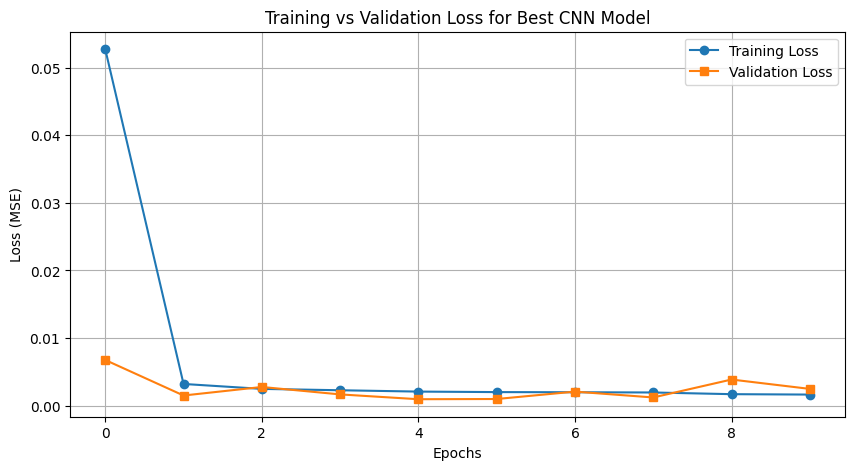

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load the best parameters from the grid search
best_filters = 32
best_kernel_size = 3
best_dropout = 0.2
best_l2_reg = 0.01

# Function to build the best CNN model
def build_best_cnn(time_steps, num_features):
    model = Sequential([
        Conv1D(filters=best_filters, kernel_size=best_kernel_size, activation="relu",
               input_shape=(time_steps, num_features), kernel_regularizer=regularizers.l2(best_l2_reg)),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(best_dropout),
        Dense(64, activation="relu"),
        Dense(1)  # Output layer (temperature prediction)
    ])

    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

# Build the best CNN model
best_cnn = build_best_cnn(time_steps=12, num_features=X_train_1hr.shape[-1])

# Callbacks: Early stopping and Learning Rate Adjustment
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)

# Train the best model
history = best_cnn.fit(
    X_train_1hr, y_train_1hr,
    validation_data=(X_test_1hr, y_test_1hr),
    epochs=50, batch_size=32, verbose=1,
    callbacks=[early_stopping, lr_scheduler]
)

# Save the trained best model
best_cnn.save("best_cnn_model_retrained.h5")

# Plot Training vs Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss", marker="o")
plt.plot(history.history["val_loss"], label="Validation Loss", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss for Best CNN Model")
plt.legend()
plt.grid()
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Generate Predictions
test_predictions = best_model.predict(X_test_1hr)

# Compute Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test_1hr, test_predictions))
mae = mean_absolute_error(y_test_1hr, test_predictions)
r2 = r2_score(y_test_1hr, test_predictions)

# Print Results
print(f"Model Evaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model Evaluation Metrics:
RMSE: 0.0266
MAE: 0.0197
R² Score: 0.8328


411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


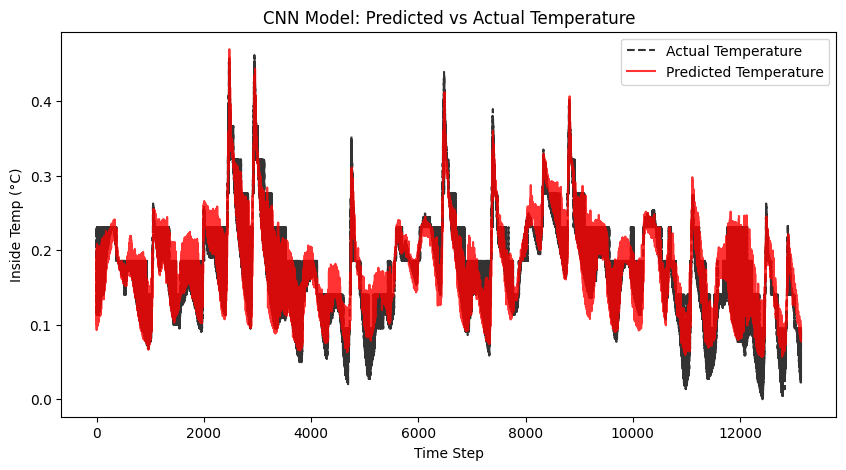

In [40]:
import matplotlib.pyplot as plt

# Generate predictions using the trained model
cnn_predictions = best_model.predict(X_test_1hr)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test_1hr, label="Actual Temperature", linestyle="dashed", color="black", alpha=0.8)
plt.plot(cnn_predictions, label="Predicted Temperature", linestyle="solid", color="red", alpha=0.8)

plt.title("CNN Model: Predicted vs Actual Temperature")
plt.xlabel("Time Step")
plt.ylabel("Inside Temp (°C)")
plt.legend()
plt.show()

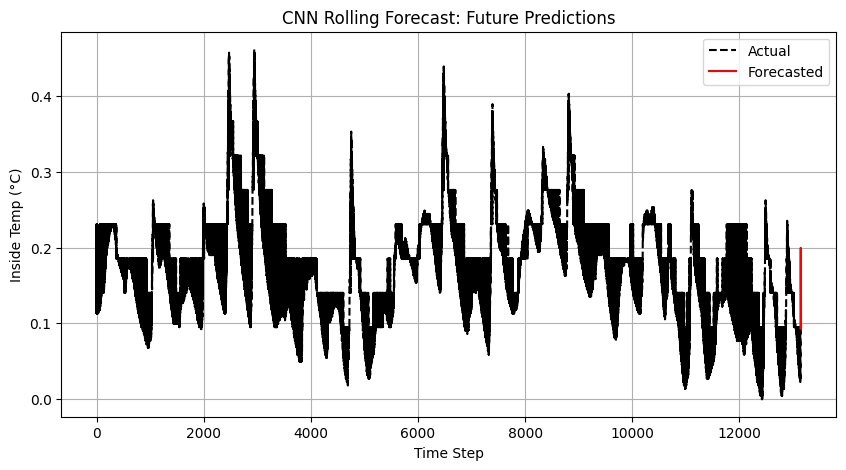

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define forecast horizon (number of steps into the future)
forecast_horizon = 12  # Forecast next 1 hour (12 time steps)

# Use the last available sequence from test data as starting point
rolling_input = X_test_1hr[-1].reshape(1, 12, X_test_1hr.shape[-1])

# Store predictions
future_predictions = []

# Perform rolling forecast
for _ in range(forecast_horizon):
    # Predict next step
    next_pred = best_model.predict(rolling_input, verbose=0)[0][0]
    future_predictions.append(next_pred)

    # Update rolling input (remove first time step, append prediction)
    rolling_input = np.roll(rolling_input, shift=-1, axis=1)
    rolling_input[0, -1, -1] = next_pred  # Replace last time step with prediction

# Generate time axis for future steps
future_time_steps = np.arange(len(y_test_1hr), len(y_test_1hr) + forecast_horizon)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_test_1hr)), y_test_1hr, label="Actual", linestyle="dashed", color="black")
plt.plot(future_time_steps, future_predictions, label="Forecasted", color="red")
plt.xlabel("Time Step")
plt.ylabel("Inside Temp (°C)")
plt.title("CNN Rolling Forecast: Future Predictions")
plt.legend()
plt.grid(True)
plt.show()